<font Color = "MediumVioletRed"  size="4"> Data Science </font>

<font size="3">Importing Libraries </font>

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
import xgboost as xgb


<font size="3">Data Preprocessing</font>

In [127]:
#read csv into dataframe and display
df = pd.read_csv('C:/Users/kiran/OneDrive/Desktop/Data Science/telco-customer-churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [128]:
#list the datatypes of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [129]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [130]:
df.shape

(7043, 21)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [132]:
#Above shows the data types of each column. As the total charges is object, we need to convert it to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [133]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [134]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [135]:
#check whether there are any duplicated rows
df.duplicated().sum()

0

#Data Imputation is: fill null with mean values

In [136]:
#there are 11 null values in total charges column. Filling them with mean of the column.
fill_Column=df['TotalCharges'].mean()
df['TotalCharges'].fillna(value=fill_Column,inplace=True)

In [137]:
#Now check for null values
df.isnull().sum()
#no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [138]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


In [139]:
#replace No and yes with 0 and 1
df['Churn'] = df['Churn'].replace("No", 0).replace("Yes", 1)

In [140]:
#dropping customerID from dataset
customer_id_df=df['customerID']
df.drop(['customerID'],axis = 1,inplace=True)

In [141]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [142]:
#Transform data – all entries should be numeric. 
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
Label_Encoder_Variable = LabelEncoder()
df = df.apply(Label_Encoder_Variable.fit_transform)
print(df)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [143]:
display(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [144]:
display(df.dtypes)

gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object

In [145]:
#Rearranging columns
df = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV','Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]
df


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,142,74,0,1,0,0,1,0,0,2,2,0,0,0,0,1,2,0
1,0,34,498,3624,1,0,0,1,0,0,2,0,0,2,0,0,1,0,3,0
2,0,2,436,536,1,0,0,1,0,0,2,2,2,0,0,0,0,1,3,1
3,0,45,266,3570,1,0,0,0,1,0,2,0,0,2,2,0,1,0,0,0
4,0,2,729,674,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,991,3700,1,1,1,1,2,0,2,0,0,2,2,2,1,1,3,0
7039,0,72,1340,6305,0,1,1,1,2,1,0,2,2,2,0,2,1,1,1,0
7040,0,11,137,1265,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,4,795,1157,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


<font size="3"> Data Imputation </font>

In [146]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
scaler.fit(df.drop(['Churn'],axis = 1))
scaled_features = scaler.transform(df.drop('Churn',axis = 1))

In [147]:
#Feature Selection
from sklearn.model_selection import train_test_split
features = scaled_features
target = df['Churn']
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.2,random_state=44)

<font Size = "6">Step 1: Model Development(Without SMOTE Technique)</font>

### Logistic Regression

In [148]:
#train logistic regression model
from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression()
logisticmodel.fit(features_train,target_train)

LogisticRegression()

In [149]:
#prediction
predR = logisticmodel.predict(features_test)
predR

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<AxesSubplot:>

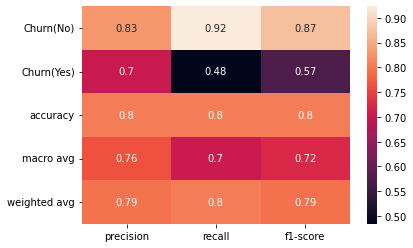

In [150]:
#print classification report
clf_report=classification_report(target_test,predR,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
clf_report
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [248]:
#print score
print("Score for Logistic Regression is: ", logisticmodel.score(features_test,target_test))

Score for Logistic Regression is:  0.7164251207729468


In [152]:
#confusion matrix
confusionmatrixvariable=confusion_matrix(target_test,predR)
df_confusionmatrixvariable = pd.DataFrame(confusionmatrixvariable, index=['No','Yes'], columns=['No','Yes'])

In [153]:
df_confusionmatrixvariable

,No,Yes
No,948,79
Yes,197,185


In [154]:
print("Recall Value for Logistic Regression is: ", recall_score(target_test,predR))

Recall Value for Logistic Regression is:  0.48429319371727747


### Naive Bayes Model

In [155]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(features_train,target_train)

GaussianNB()

In [246]:
predNB = nb_model.predict(features_test)

<AxesSubplot:>

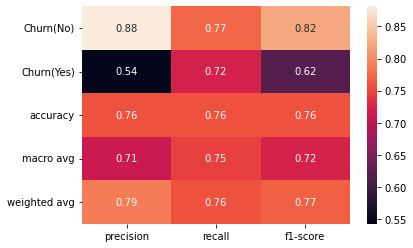

In [157]:
clf_report=classification_report(target_test,predNB,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [158]:
print("Score for Naive Baye's gaussian Model is: ", nb_model.score(features_test,target_test))

Score for Naive Baye's gaussian Model is:  0.759403832505323


In [159]:
confusionmatrixvariable=confusion_matrix(target_test,predNB)
df_confusionmatrixvariable = pd.DataFrame(confusionmatrixvariable, index=['No','Yes'], columns=['No','Yes'])

In [160]:
from pretty_confusion_matrix import pp_matrix
df_confusionmatrixvariable

,No,Yes
No,795,232
Yes,107,275


In [161]:
recall_score(target_test,predNB)

0.7198952879581152

### Random Forest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(features_train,target_train)

RandomForestClassifier()

In [163]:
predRF = rf_model.predict(features_test)

<AxesSubplot:>

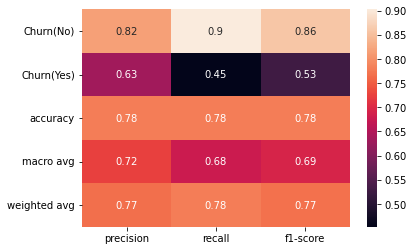

In [164]:
clf_report=classification_report(target_test,predRF,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [165]:
rf_model.score(features_test,target_test)

0.7806955287437899

In [166]:
confusionmatrixvariable=confusion_matrix(target_test,predRF)
df_confusionmatrixvariable = pd.DataFrame(confusionmatrixvariable, index=['No','Yes'], columns=['No','Yes'])

In [168]:
print("Recall value for Naive Baye's is: ", recall_score(target_test,predRF))

Recall value for Naive Baye's is:  0.45287958115183247


### XGBoost

In [169]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(features_train, target_train)

[18:43:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
predXGB = xgb_model.predict(features_test)

<AxesSubplot:>

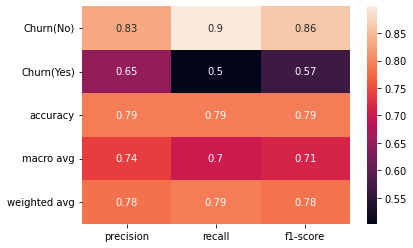

In [171]:
clf_report=classification_report(target_test,predXGB,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [172]:
xgb_model.score(features_test,target_test)

0.7913413768630234

In [173]:
confusionmatrixvariable=confusion_matrix(target_test,predXGB)
df_confusionmatrixvariable = pd.DataFrame(confusionmatrixvariable, index=['No','Yes'], columns=['No','Yes'])

In [174]:
print("Recall value for XGBoost is: ", recall_score(target_test,predXGB))

Recall value for XGBoost is:  0.5026178010471204


## Hyper parameter Tuning ( Random Forest and XGBoost)

In [175]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_params_xgb={
'learning_rate' : [0.1,  0.2,  0.3],
'max_depth' : [ 6,10,15,20],
}
random_search = RandomizedSearchCV(xgb_model, random_params_xgb, scoring='recall',cv = 5, n_jobs = -1, verbose = 1)
random_search.fit(features_train, target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_parallel_tree=1,
                                           predictor='auto

In [176]:
print(random_search.best_estimator_)
print(random_search.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.5111043319097011


In [177]:
xgb_model=random_search.best_estimator_
xgb_model.fit(features_train, target_train)

[18:44:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [178]:
predXGB = xgb_model.predict(features_test)

In [179]:
recall_score(target_test,predXGB)

0.49476439790575916

<AxesSubplot:>

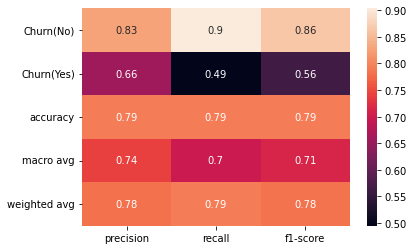

In [180]:
clf_report=classification_report(target_test,predXGB,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [181]:
xgb_model.score(features_test,target_test)

0.7927608232789212

In [182]:
cm=confusion_matrix(target_test,predXGB)
df_confusionmatrixvariable = pd.DataFrame(cm, index=['No','Yes'], columns=['No','Yes'])
df_confusionmatrixvariable

,No,Yes
No,928,99
Yes,193,189


In [183]:
random_params_RF = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [0,3, 5, 7, 10],
    'min_samples_split' : range(1, 10, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'n_estimators':[100,200,400,600,800]
}
random_search_RF = RandomizedSearchCV(rf_model, random_params_RF, scoring='recall',cv = 5, n_jobs = -1, verbose = 1)
random_search_RF.fit(features_train, target_train)
print(random_search_RF.best_estimator_)
print(random_search_RF.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\kiran\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kiran\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kiran\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\kiran\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\kiran\anaconda3\lib\site-packages\job

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       n_estimators=200)
0.5077373285426977


In [184]:
rf_model = random_search_RF.best_estimator_
rf_model.fit(features_train,target_train)
predRF = rf_model.predict(features_test)

In [185]:
rf_model.score(features_test,target_test)

0.7991483321504613

In [186]:
predRF = rf_model.predict(features_test)

<AxesSubplot:>

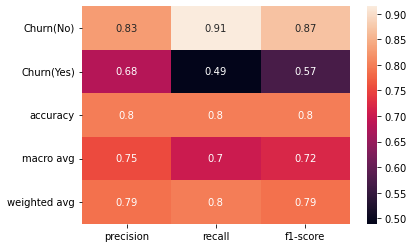

In [187]:
clf_report=classification_report(target_test,predRF,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [188]:
cm=confusion_matrix(target_test,predRF)
df_confusionmatrixvariable = pd.DataFrame(cm, index=['No','Yes'], columns=['No','Yes'])

In [189]:
recall_score(target_test,predRF)

0.4895287958115183

# Step-2 Model Development(With SMOTE Technique)

In [247]:
from imblearn.over_sampling import SMOTE 
oversample=SMOTE()
features_new,target_new=oversample.fit_resample(features,target)

In [191]:
features_new.shape,target_new.shape

((10348, 19), (10348,))

In [192]:
features_train, features_test, target_train, target_test = train_test_split( features_new, target_new, test_size=0.2, random_state=44)

### Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(features_train,target_train)

LogisticRegression()

In [194]:
predR = logmodel.predict(features_test)

<AxesSubplot:>

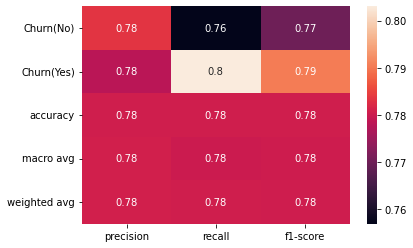

In [195]:
clf_report=classification_report(target_test,predR,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [196]:
print("Logistic Regression with SMOTE TECHNIQUE has f1 Score of: ", logmodel.score(features_test,target_test))

Logistic Regression with SMOTE TECHNIQUE has f1 Score of:  0.7806763285024154


In [197]:
confusionmatrixvariable=confusion_matrix(target_test,predR)
df_confusionmatrixvariable = pd.DataFrame(cm, index=['No','Yes'], columns=['No','Yes'])

In [198]:
print("Recall for Logistic Regression model is:", recall_score(target_test,predR))

Recall for Logistic Regression model is: 0.8030018761726079


### Naive Bayes

In [199]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(features_train,target_train)

GaussianNB()

In [200]:
predNB = nb_model.predict(features_test)

<AxesSubplot:>

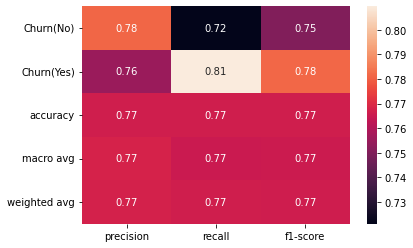

In [201]:
clf_report=classification_report(target_test,predNB,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [202]:
nb_model.score(features_test,target_test)

0.7666666666666667

In [203]:
cm=confusion_matrix(target_test,predNB)
df_confusionmatrixvariable = pd.DataFrame(cm, index=['No','Yes'], columns=['No','Yes'])

In [204]:
print("Recall value for Naive BAyes is:", recall_score(target_test,predNB))

Recall value for Naive BAyes is: 0.8095684803001876


### Random Forest Classifier

In [205]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(features_train,target_train)

RandomForestClassifier()

In [206]:
predRF = rf_model.predict(features_test)

<AxesSubplot:>

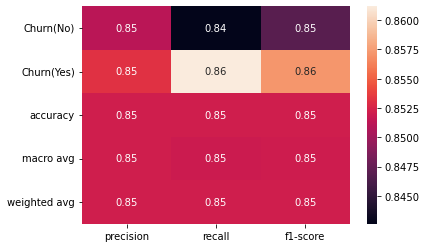

In [207]:
clf_report=classification_report(target_test,predRF,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [208]:
cm=confusion_matrix(target_test,predRF)
df_confusionmatrixvariable = pd.DataFrame(cm, index=['No','Yes'], columns=['No','Yes'])

In [209]:
print("Recall value for RFC: ",recall_score(target_test,predRF))

Recall value for RFC:  0.8611632270168855


### XGBoost

In [225]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(features_train, target_train)

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:45:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [226]:
predXGB = xgb_model.predict(features_test)

<AxesSubplot:>

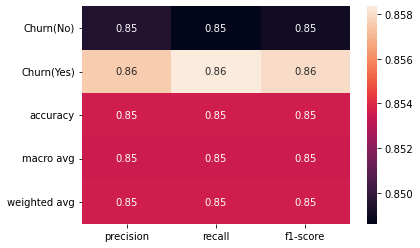

In [227]:
clf_report=classification_report(target_test,predXGB,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [213]:
xgb_model.score(features_test,target_test)

0.8536231884057971

In [214]:
cm=confusion_matrix(target_test,predXGB)
df_confusionmatrixvariable = pd.DataFrame(cm, index=['No','Yes'], columns=['No','Yes'])

In [215]:
print("Recall value for XGBoost is :", recall_score(target_test,predXGB))

Recall value for XGBoost is : 0.8583489681050657


## Hyper parameter Tuning ( Random Forest and XGBoost)

In [216]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_params_xgb={
'learning_rate' : [0.1,  0.2,  0.3],
'max_depth' : [ 6,10,15,20],
}
random_search = RandomizedSearchCV(xgb_model, random_params_xgb, scoring='recall',cv = 5, n_jobs = -1, verbose = 1)
random_search.fit(features_train, target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:45:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_parallel_tree=1,
                                           predictor='auto

In [228]:
print(random_search.best_estimator_)
print(random_search.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.8610050647391615


In [231]:
xgb_model=random_search.best_estimator_
xgb_model.fit(features_train, target_train)

[18:48:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [244]:
predXGB = xgb_model.predict(features_test)

In [233]:
recall_score(target_test,predXGB)

0.8621013133208255

<AxesSubplot:>

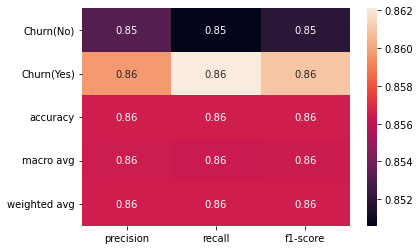

In [221]:
clf_report=classification_report(target_test,predXGB,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [222]:
xgb_model.score(features_test,target_test)

0.8565217391304348

In [234]:
cm=confusion_matrix(target_test,predXGB)
df_confusionmatrixvariable = pd.DataFrame(cm, index=['No','Yes'], columns=['No','Yes'])

In [235]:
random_params_RF = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [0,3, 5, 7, 10],
    'min_samples_split' : range(1, 10, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'n_estimators':[100,200,400,600,800]
}
random_search_RF = RandomizedSearchCV(rf_model, random_params_RF, scoring='recall',cv = 5, n_jobs = -1, verbose = 1)
random_search_RF.fit(features_train, target_train)
print(random_search_RF.best_estimator_)
print(random_search_RF.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\kiran\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kiran\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kiran\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\kiran\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\kiran\anaconda3\lib\site-packages\jo

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=200)
0.8585669366477887


In [236]:
rf_model = random_search_RF.best_estimator_
rf_model.fit(features_train,target_train)
predRF = rf_model.predict(features_test)

In [237]:
rf_model.score(features_test,target_test)

0.8260869565217391

In [238]:
predRF = rf_model.predict(features_test)

<AxesSubplot:>

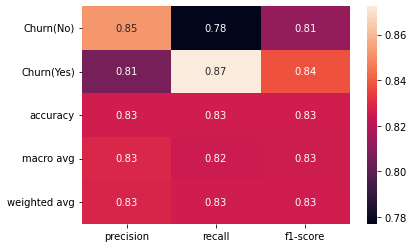

In [239]:
clf_report=classification_report(target_test,predRF,target_names=['Churn(No)','Churn(Yes)'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [243]:
cm=confusion_matrix(target_test,predRF)
df_confusionmatrixvariable = pd.DataFrame(cm, index=['No','Yes'], columns=['No','Yes'])
df_confusionmatrixvariable

,No,Yes
No,780,224
Yes,136,930


In [242]:
recall_score(target_test,predRF)

0.8724202626641651